In [72]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [73]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [74]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [75]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [76]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


Importing the libraries

In [77]:
import pandas as pd

In [78]:
import numpy as np

In [79]:
import matplotlib.pyplot as plt

In [80]:
import seaborn as sns

In [81]:
from sklearn import metrics

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
from sklearn.metrics import accuracy_score

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
from sklearn.svm import SVC

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

STEP1: Data Acquisition

In [89]:
heart_data = pd.read_csv("heart_disease_data.csv")

In [90]:
heart_data.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [91]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [92]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [93]:
heart_data['target'].value_counts()  #here the data is categorical with 0 representing the person with no heart disease and 1 with heart disease

target
1    165
0    138
Name: count, dtype: int64

In [94]:
#trestbps - resting blood pressure (in mm Hg on admission to the hospital)
#restecg - resting electrocardiographic results 0= normal,1 =ST wave and 2= abnormality
#fbs- fasting blood sugar
#cp - cheest pain type
#thalach - maximum heart rate achieved
#oldpeak - ST depression induced by exercise relative to rest

STEP2: Data Filtering

In [95]:
heart_data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [96]:
heart_data.isnull().sum()/len(heart_data)*100

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

<Axes: xlabel='sex', ylabel='count'>

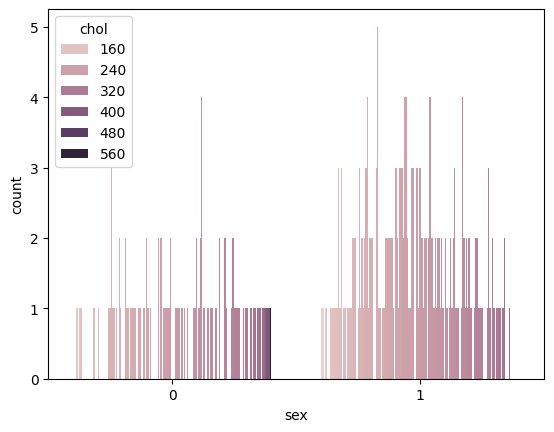

In [97]:
sns.countplot( x="sex", hue="chol", data=heart_data)

<Axes: xlabel='cp', ylabel='count'>

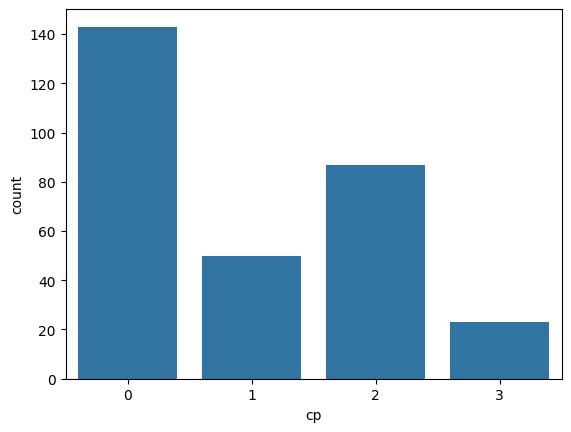

In [98]:
sns.countplot( x="cp", data=heart_data)

<Axes: xlabel='ca', ylabel='count'>

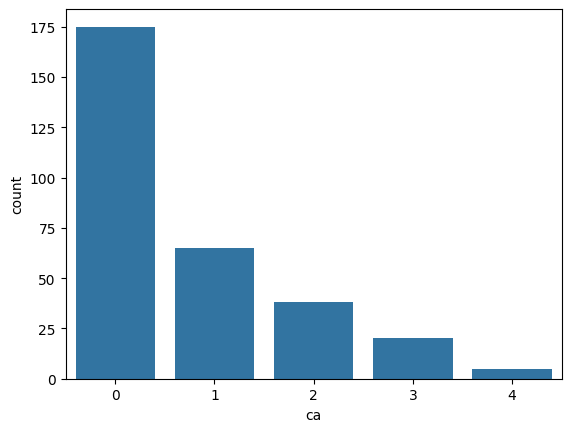

In [99]:
sns.countplot(x="ca" , data= heart_data)

check missing values by missingno

In [100]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [101]:
import missingno as msno

<Axes: >

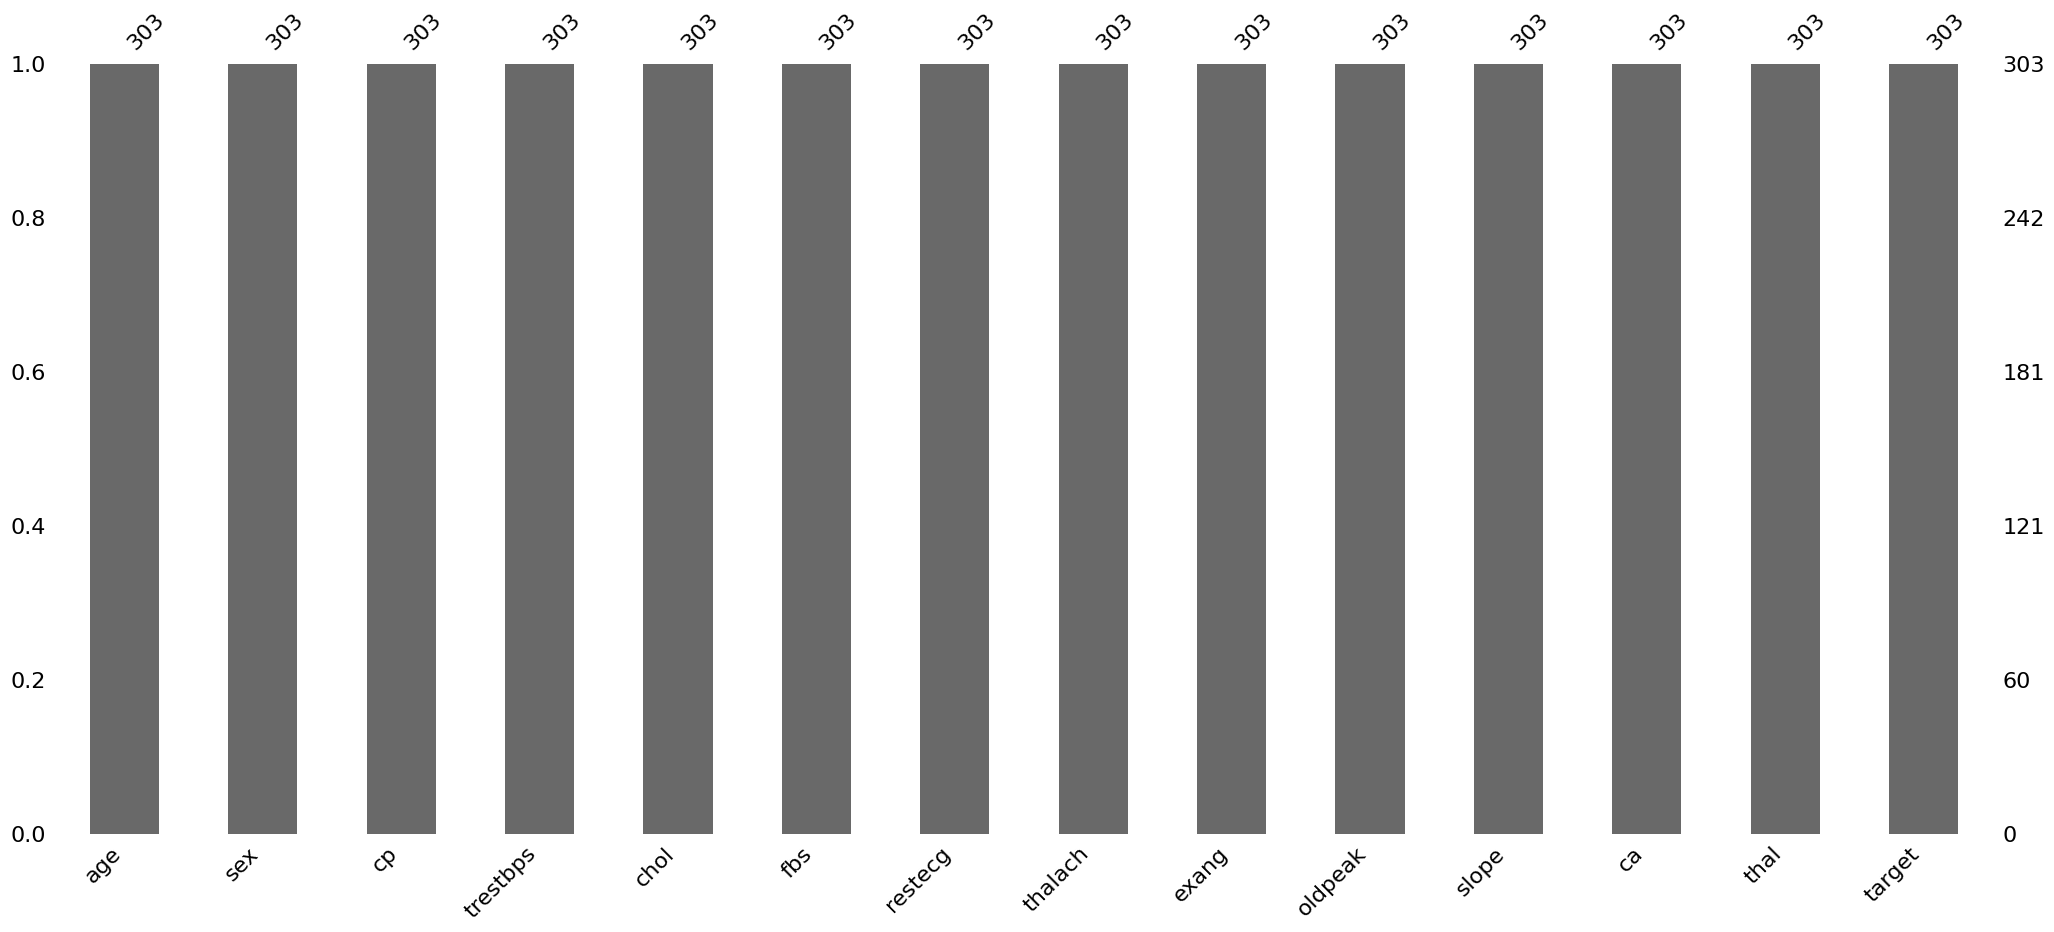

In [102]:
msno.bar(heart_data)

STEP3 : Slit Data

In [103]:
X = heart_data.drop(["target"], axis=1)

In [104]:
y = heart_data["target"]

In [105]:
#y

In [106]:
from sklearn.preprocessing import LabelEncoder

In [107]:
le = LabelEncoder()

In [108]:
heart_data['target'] = le.fit_transform(heart_data.target)
heart_data["target"].sample(5)

236    0
191    0
1      1
68     1
114    1
Name: target, dtype: int64

Finding the correlation

In [109]:
feature_cols = heart_data.columns[:-1]

In [110]:
corr_values = heart_data[feature_cols].corr()

In [111]:
corr_values   #here x,y and y,x is giving the same value so we null the values below the diagonal

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244


In [112]:
tril_index = np.tril_indices_from(corr_values)

In [113]:
tril_index

(array([ 0,  1,  1,  2,  2,  2,  3,  3,  3,  3,  4,  4,  4,  4,  4,  5,  5,
         5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,
         7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,
         9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11,
        11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12]),
 array([ 0,  0,  1,  0,  1,  2,  0,  1,  2,  3,  0,  1,  2,  3,  4,  0,  1,
         2,  3,  4,  5,  0,  1,  2,  3,  4,  5,  6,  0,  1,  2,  3,  4,  5,
         6,  7,  0,  1,  2,  3,  4,  5,  6,  7,  8,  0,  1,  2,  3,  4,  5,
         6,  7,  8,  9,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,
         2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,
         7,  8,  9, 10, 11, 12]))

In [114]:
#corr_array = np.array(corr_values)
#corr_array[np.tril_indices_from(corr_values)] = np.nan

In [115]:
#pd.DataFrame(corr_array)

In [116]:
#corr_values = pd.DataFrame(corr_array,columns= corr_values.columns, index = corr_values.index)
#corr_values.stack().to_frame().reset_index()

In [117]:
#corr_values = (corr_values
              # .stack()
             #  .to_frame()
            #   .reset_index()
           #    .rename(columns={'level_0':'feature1',
                              #  'level_1':'feature2',
                             #   0:'correlation'}))

In [118]:
#corr_values['abs_correlation'] = corr_values.correlation.abs()

In [119]:
#corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.5')

In [120]:
(X_train, X_test,y_train,y_test) = train_test_split(X,y, test_size = 0.20,random_state =2, stratify =y )

In [121]:
print(X_train.shape,
     y_train.shape)

(242, 13) (242,)


In [122]:
lr = LogisticRegression()

In [123]:
lr.fit(X_train,y_train)

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [124]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [125]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [126]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [127]:
svm_predictions = svm_model.predict(X_test)
logreg_predictions = lr.predict(X_test)
knn_predictions = knn_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

In [128]:
svm_accuracy = accuracy_score(y_test, svm_predictions)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)



In [129]:
print(f"SVM Accuracy: {svm_accuracy}")
print(f"Logistic Regression Accuracy: {logreg_accuracy}")
print(f"KNN Accuracy: {knn_accuracy}")
print(f"Random Forest Accuracy: {rf_accuracy}")

SVM Accuracy: 0.819672131147541
Logistic Regression Accuracy: 0.819672131147541
KNN Accuracy: 0.6229508196721312
Random Forest Accuracy: 0.8032786885245902


In [130]:
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)

In [131]:
lr_precision = precision_score(y_test, logreg_predictions)
lr_recall = recall_score(y_test, logreg_predictions)
lr_f1 = f1_score(y_test, logreg_predictions)

In [132]:
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

In [133]:
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)

In [134]:
print("SVM Metrics:")
print(f"Accuracy: {svm_accuracy}")
print(f"Precision: {svm_precision}")
print(f"Recall: {svm_recall}")
print(f"F1 Score: {svm_f1}\n")

SVM Metrics:
Accuracy: 0.819672131147541
Precision: 0.8055555555555556
Recall: 0.8787878787878788
F1 Score: 0.8405797101449275



In [135]:
print("Logistic Regression Metrics:")
print(f"Accuracy: {logreg_accuracy}")
print(f"Precision: {lr_precision}")
print(f"Recall: {lr_recall}")
print(f"F1 Score: {lr_f1}\n")


Logistic Regression Metrics:
Accuracy: 0.819672131147541
Precision: 0.84375
Recall: 0.8181818181818182
F1 Score: 0.8307692307692308



In [136]:
print("KNN Metrics:")
print(f"Accuracy: {knn_accuracy}")
print(f"Precision: {knn_precision}")
print(f"Recall: {knn_recall}")
print(f"F1 Score: {knn_f1}\n")

KNN Metrics:
Accuracy: 0.6229508196721312
Precision: 0.6470588235294118
Recall: 0.6666666666666666
F1 Score: 0.6567164179104478



In [137]:
print("Random Forest Metrics:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1 Score: {rf_f1}\n")

Random Forest Metrics:
Accuracy: 0.8032786885245902
Precision: 0.8387096774193549
Recall: 0.7878787878787878
F1 Score: 0.8125



In [138]:
prediction_X_train = lr.predict(X_train)

In [139]:
training_data_accuracy = accuracy_score(prediction_X_train ,y_train)

In [140]:
print('Accuracy score :',training_data_accuracy)

Accuracy score : 0.8512396694214877


Checking the input

In [142]:
input_data = (55,1,0,160,289,0,0,145,1,0.8,1,1,3)

In [143]:
input_as_numpy_array= np.asarray(input_data)

In [ ]:
#now we need to predict the values only for one value so we need to reshape the array

In [144]:
input_data_reshaped = input_as_numpy_array.reshape(1,-1)

In [145]:
prediction1 = lr.predict(input_data_reshaped)
prediction2 = svm_model.predict(input_data_reshaped)
prediction3 = rf_model.predict(input_data_reshaped)
prediction4 = knn_model.predict(input_data_reshaped)

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#if (prediction1[0] == 0):
  #  print("The person does not have heart disease")
#else:
   # print("The person may have heart disease.")

In [146]:
if (prediction1 == prediction2 == 0):
     print("The person does not have heart disease")
else:
    print("The person may have heart disease.")

The person does not have heart disease
